<a href="https://colab.research.google.com/github/ribesstefano/chalmers_dat340_applied_machine_learning/blob/main/assignment_4/DAT340_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group PA 47 - Author: Stefano Ribes, ribes@chalmers.se

This Notebook can be viewed online at this link: https://colab.research.google.com/drive/1tGfajmrxsvp4NqQyzJDwlUnr7m3wm79B?usp=sharing

# Programming Assignment 4: Implementing linear classifiers

## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

ASSIGNMENT_ID = 'assignment_4'

data_dir = os.path.join(os.path.abspath(''), 'drive', 'MyDrive')
data_dir = os.path.join(data_dir, 'Colab Notebooks', 'dat340', ASSIGNMENT_ID)
data_dir = os.path.join(data_dir, 'data')
if os.path.exists(data_dir):
    print(f'Directory "{data_dir}" exists')
else:
    print(f'WARNING! Directory "{data_dir}" does not exist!')

Directory "/content/drive/MyDrive/Colab Notebooks/dat340/assignment_4/data" exists


In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

## Exercise question

> Do you have an idea what's going on? Why could the classifier "memorize" the training data in the first case, but not in the second case?

Let's reproduce the example first.

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

X1 = [{'city':'Gothenburg', 'month':'July'},
      {'city':'Gothenburg', 'month':'December'},
      {'city':'Paris', 'month':'July'},
      {'city':'Paris', 'month':'December'}]
Y1 = ['rain', 'rain', 'sun', 'rain']

X2 = [{'city':'Sydney', 'month':'July'},
      {'city':'Sydney', 'month':'December'},
      {'city':'Paris', 'month':'July'},
      {'city':'Paris', 'month':'December'}]
Y2 = ['rain', 'sun', 'sun', 'rain']

classifier1 = make_pipeline(DictVectorizer(), Perceptron(max_iter=10))
classifier1.fit(X1, Y1)
guesses1 = classifier1.predict(X1)
print(f'Accuracy Perceptron dataset n.1: {accuracy_score(Y1, guesses1)}')

classifier2 = make_pipeline(DictVectorizer(), Perceptron(max_iter=10))
classifier2.fit(X2, Y2)
guesses2 = classifier2.predict(X2)
print(f'Accuracy Perceptron dataset n.2: {accuracy_score(Y2, guesses2)}')

classifier3 = make_pipeline(DictVectorizer(), LinearSVC())
classifier3.fit(X2, Y2)
guesses3 = classifier3.predict(X2)
print(f'Accuracy LinearSVC dataset n.2:  {accuracy_score(Y2, guesses3)}')

Accuracy Perceptron dataset n.1: 1.0
Accuracy Perceptron dataset n.2: 0.5
Accuracy LinearSVC dataset n.2:  0.5


The problem is that the first dataset is linearly seperable, whereas the second one is not. Because of that, the linear classifiers aren't able to correctly separate the points in the second dataset.

We can indeed obtain the same accuracy scores by replacing their labels with numerical values. This also allows us to easily visualize the datapoints in the two datasets.

In [5]:
cities = {
    'Paris': 0,
    'Gothenburg': 1,
    'Sydney': 2,
}
months = {
    'July': 1,
    'December': 0,
}
weather = {
    'rain': 1,
    'sun': 0,
}

X1 = [{'city':cities['Gothenburg'], 'month':months['July']},
      {'city':cities['Gothenburg'], 'month':months['December']},
      {'city':cities['Paris'], 'month':months['July']},
      {'city':cities['Paris'], 'month':months['December']}]
Y1 = [weather['rain'], weather['rain'], weather['sun'], weather['rain']]

X2 = [{'city':cities['Sydney'], 'month':months['July']},
      {'city':cities['Sydney'], 'month':months['December']},
      {'city':cities['Paris'], 'month':months['July']},
      {'city':cities['Paris'], 'month':months['December']}]
Y2 = [weather['rain'], weather['sun'], weather['sun'], weather['rain']]

classifier1 = make_pipeline(DictVectorizer(), Perceptron(max_iter=10))
classifier1.fit(X1, Y1)
guesses1 = classifier1.predict(X1)
print(f'Accuracy Perceptron dataset n.1: {accuracy_score(Y1, guesses1)}')

classifier2 = make_pipeline(DictVectorizer(), Perceptron(max_iter=10))
classifier2.fit(X2, Y2)
guesses2 = classifier2.predict(X2)
print(f'Accuracy Perceptron dataset n.2: {accuracy_score(Y2, guesses2)}')

classifier3 = make_pipeline(DictVectorizer(), LinearSVC())
classifier3.fit(X2, Y2)
guesses3 = classifier3.predict(X2)
print(f'Accuracy LinearSVC dataset n.2:  {accuracy_score(Y2, guesses3)}')

Accuracy Perceptron dataset n.1: 1.0
Accuracy Perceptron dataset n.2: 0.5
Accuracy LinearSVC dataset n.2:  0.5


As expected the scores are the same. Let's now see the points on a 2D plane.

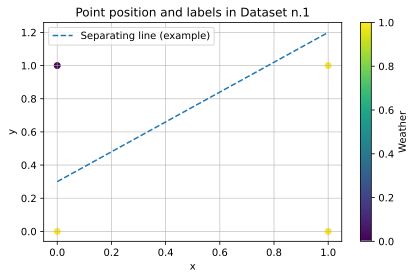

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x_coords = []
y_coords = []
for x1 in X1:
    x_coords.append(x1['city'])
    y_coords.append(x1['month'])
plt.scatter(x_coords, y_coords, c=Y1)
plt.plot(np.linspace(0, 1), np.linspace(0, 1) * 0.9 + 0.3, '--', label='Separating line (example)')
plt.grid(which='both', axis='both', alpha=0.7, zorder=1)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.title('Point position and labels in Dataset n.1')
plt.tight_layout()
plt.colorbar(label='Weather')
plt.show()

For dataset n.1, we can ideally draw a line to separate the points in two separate sets according to their labels. This is however not possible for the points in dataset n.2, as showed as follows.

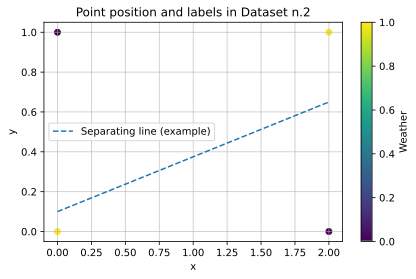

In [11]:
x_coords = []
y_coords = []
for x2 in X2:
    x_coords.append(x2['city'])
    y_coords.append(x2['month'])
plt.scatter(x_coords, y_coords, c=Y2)
plt.grid(which='both', axis='both', alpha=0.7, zorder=1)
plt.plot(np.linspace(0, 2), np.linspace(0, 1) * 0.55 + 0.1, '--', label='Separating line (example)')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Point position and labels in Dataset n.2')
plt.legend()
plt.tight_layout()
plt.colorbar(label='Weather')
plt.show()

As we can see, there is no straight line which can clearly separate the two sets. Hence, at least one point per label will be missclassified, leading to a lower accuracy score.

The XOR problem: The second dataset is not linearly separable (assign 0s and 1s to the entities and build the truth table).

## Introduction

In [12]:
import numpy as np
from sklearn.base import BaseEstimator

class LinearClassifier(BaseEstimator):
    """
    General class for binary linear classifiers. Implements the predict
    function, which is the same for all binary linear classifiers. There are
    also two utility functions.
    """

    def decision_function(self, X):
        """
        Computes the decision function for the inputs X. The inputs are assumed
        to be stored in a matrix, where each row contains the features for one
        instance.
        """
        return X.dot(self.w)

    def predict(self, X):
        """
        Predicts the outputs for the inputs X. The inputs are assumed to be
        stored in a matrix, where each row contains the features for one
        instance.
        """
        # First compute the output scores
        scores = self.decision_function(X)
        # Select the positive or negative class label, depending on whether
        # the score was positive or negative.
        out = np.select([scores >= 0.0, scores < 0.0],
                        [self.positive_class,
                         self.negative_class])
        return out

    def find_classes(self, Y):
        """
        Finds the set of output classes in the output part Y of the training
        set. If there are exactly two classes, one of them is associated to
        positive classifier scores, the other one to negative scores. If the
        number of classes is not 2, an error is raised.
        """
        classes = sorted(set(Y))
        if len(classes) != 2:
            raise Exception("this does not seem to be a 2-class problem")
        self.positive_class = classes[1]
        self.negative_class = classes[0]

    def encode_outputs(self, Y):
        """
        A helper function that converts all outputs to +1 or -1.
        """
        return np.array([1 if y == self.positive_class else -1 for y in Y])


class Perceptron(LinearClassifier):
    """
    A straightforward implementation of the perceptron learning algorithm.
    """
    def __init__(self, n_iter=20):
        """
        The constructor can optionally take a parameter n_iter specifying how
        many times we want to iterate through the training set.
        """
        self.n_iter = n_iter

    def fit(self, X, Y):
        """
        Train a linear classifier using the perceptron learning algorithm.
        """
        # First determine which output class will be associated with positive
        # and negative scores, respectively.
        self.find_classes(Y)
        # Convert all outputs to +1 (for the positive class) or -1 (negative).
        Ye = self.encode_outputs(Y)
        # If necessary, convert the sparse matrix returned by a vectorizer
        # into a normal NumPy matrix.
        if not isinstance(X, np.ndarray):
            X = X.toarray()
        # Initialize the weight vector to all zeros.
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        # Perceptron algorithm:
        for i in range(self.n_iter):
            for x, y in zip(X, Ye):
                # Compute the output score for this instance.
                score = x.dot(self.w)
                # If there was an error, update the weights.
                if y * score <= 0:
                    self.w += y * x

In [66]:
import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# This function reads the corpus, returns a list of documents, and a list
# of their corresponding polarity labels. 
def read_data(corpus_file):
    X = []
    Y = []
    with open(corpus_file, encoding='utf-8') as f:
        for line in f:
            _, y, _, x = line.split(maxsplit=3)
            X.append(x.strip())
            Y.append(y)
    return X, Y

# Read all the documents.
X, Y = read_data(os.path.join(data_dir, 'all_sentiment_shuffled.txt'))
# Split into training and test parts.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2,
                                                random_state=0)
# Set up the preprocessing steps and the classifier.
pipeline = make_pipeline(
    TfidfVectorizer(),
    SelectKBest(k=1000),
    Normalizer(),
    # NB that this is our Perceptron, not sklearn.linear_model.Perceptron
    Perceptron(n_iter=16)
)
# Train the classifier.
t0 = time.time()
pipeline.fit(Xtrain, Ytrain)
t1 = time.time()
print(f'Perceptron training time: {t1 - t0:.2f}s')
# Evaluate on the test set.
Yguess = pipeline.predict(Xtest)
accuracy = accuracy_score(Ytest, Yguess)
print(f'Perceptron accuracy: {accuracy:.4f}')
# Save metrics for comparison
models = {
    'Perceptron' : {
        'model': pipeline,
        'training_time': t1-t0,
        'accuracy': accuracy
    },
}

Perceptron training time: 2.00s
Perceptron accuracy: 0.7935


## Implementing the SVC

In [67]:
class LinearSVC(LinearClassifier):
    """
    A straightforward implementation of the linear SVC learning algorithm.
    """
    def __init__(self, n_iter=20, C=1):
        """
        The constructor can optionally take a parameter n_iter specifying how
        many times we want to iterate through the training set.
        """
        self.n_iter = n_iter
        self.C = C

    def fit(self, X, Y):
        """
        Train a linear classifier using the linear SVC learning algorithm.
        """
        # First determine which output class will be associated with positive
        # and negative scores, respectively.
        self.find_classes(Y)
        # Convert all outputs to +1 (for the positive class) or -1 (negative).
        Ye = self.encode_outputs(Y)
        # If necessary, convert the sparse matrix returned by a vectorizer
        # into a normal NumPy matrix.
        if not isinstance(X, np.ndarray):
            X = X.toarray()
        # Initialize the weight vector to all zeros.
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        t = 0
        for i in range(self.n_iter):
            rand_order = np.arange(X.shape[0])
            np.random.shuffle(rand_order)
            for j in rand_order:
                x, y = X[j], Ye[j]
                t += 1
                eta = 1 / (self.C * t)
                # Compute the output score for this instance.
                score = x.dot(self.w)
                self.w = (1 - eta * self.C) * self.w
                if y * score < 1:
                    self.w += (eta * y) * x

In [68]:
# Set up the preprocessing steps and the classifier.
svc_pipeline = make_pipeline(
    TfidfVectorizer(),
    SelectKBest(k=5000),
    Normalizer(),
    # NB that this is our LinearSVC, not sklearn.linear_model.LinearSVC
    LinearSVC(n_iter=16, C=1/len(Xtrain))
)
# Train the classifier.
t0 = time.time()
svc_pipeline.fit(Xtrain, Ytrain)
t1 = time.time()
print(f'SVC training time: {t1 - t0:.2f}s')
# Evaluate on the test set.
Yguess = svc_pipeline.predict(Xtest)
accuracy = accuracy_score(Ytest, Yguess)
print(f'SVC accuracy: {accuracy:.4f}')
models['LinearSVC'] = {
    'model': svc_pipeline,
    'training_time': t1-t0,
    'accuracy': accuracy
}

SVC training time: 3.98s
SVC accuracy: 0.8443


## Logistic regression

In [69]:
class LogisticRegression(LinearClassifier):
    """
    A straightforward implementation of the perceptron learning algorithm.
    """

    def __init__(self, n_iter=20, C=1):
        """
        The constructor can optionally take a parameter n_iter specifying how
        many times we want to iterate through the training set.
        """
        self.n_iter = n_iter
        self.C = C

    def fit(self, X, Y):
        """
        Train a linear classifier using the perceptron learning algorithm.
        """
        # First determine which output class will be associated with positive
        # and negative scores, respectively.
        self.find_classes(Y)
        # Convert all outputs to +1 (for the positive class) or -1 (negative).
        Ye = self.encode_outputs(Y)
        # If necessary, convert the sparse matrix returned by a vectorizer
        # into a normal NumPy matrix.
        if not isinstance(X, np.ndarray):
            X = X.toarray()
        # Initialize the weight vector to all zeros.
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        t = 0
        for i in range(self.n_iter):
            rand_order = np.arange(X.shape[0])
            np.random.shuffle(rand_order)
            for j in rand_order:
                x, y = X[j], Ye[j]
                t += 1
                eta = 1 / (self.C * t)
                # Compute the output score for this instance.
                score = x.dot(self.w)
                self.w = (1 - eta * self.C) * self.w + y / (1 + np.exp(y * self.w * x)) * x

In [70]:
# Set up the preprocessing steps and the classifier.
lrclassifier_pipeline = make_pipeline(
    TfidfVectorizer(),
    SelectKBest(k=1000),
    Normalizer(),
    # NB that this is our LogisticRegression, not sklearn.linear_model.LogisticRegression
    LogisticRegression(n_iter=16, C=1/len(Xtrain))
)
# Train the classifier.
t0 = time.time()
lrclassifier_pipeline.fit(Xtrain, Ytrain)
t1 = time.time()
print(f'Logistic Regression training time: {t1 - t0:.2f}s')
# Evaluate on the test set.
Yguess = lrclassifier_pipeline.predict(Xtest)
accuracy = accuracy_score(Ytest, Yguess)
print(f'Logistic Regression accuracy: {accuracy:.4f}')
models['Logistic Regression'] = {
    'model': lrclassifier_pipeline,
    'training_time': t1-t0,
    'accuracy': accuracy
}

Logistic Regression training time: 5.01s
Logistic Regression accuracy: 0.8166


## Comparison

Perceptron accuracy score: 0.794
LinearSVC accuracy score: 0.844
Logistic Regression accuracy score: 0.817


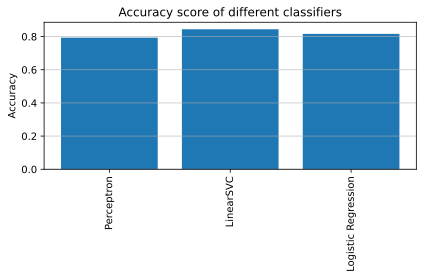

In [71]:
import matplotlib.pyplot as plt

def plot_accuracy():
    scores = {}
    for model_type in models.keys():
        print(f'{model_type} accuracy score: {models[model_type]["accuracy"]:.3f}')
        scores[model_type] = models[model_type]['accuracy']
    linspace = [x for x in range(len(models.keys()))]
    plt.bar(linspace, scores.values())
    plt.xticks(linspace, [f'{m}' for m in models.keys()], rotation=90)
    plt.grid(which='both', axis='y', alpha=0.7, zorder=1)
    plt.ylabel('Accuracy')
    plt.title('Accuracy score of different classifiers')
    plt.tight_layout()
    # plt.savefig(os.path.join(data_dir, f'accuracy.pdf'))
    plt.show()

plot_accuracy()

Perceptron training time: 2.003s
LinearSVC training time: 3.979s
Logistic Regression training time: 5.005s


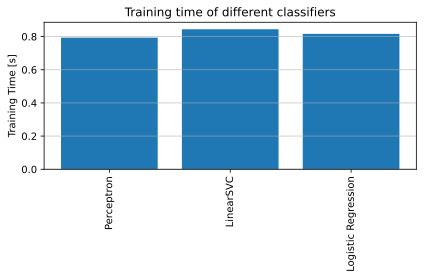

In [72]:
def plot_training_time():
    scores = {}
    for model_type in models.keys():
        print(f'{model_type} training time: {models[model_type]["training_time"]:.3f}s')
        scores[model_type] = models[model_type]['accuracy']
    linspace = [x for x in range(len(models.keys()))]
    plt.bar(linspace, scores.values())
    plt.xticks(linspace, [f'{m}' for m in models.keys()], rotation=90)
    plt.grid(which='both', axis='y', alpha=0.7, zorder=1)
    plt.ylabel('Training Time [s]')
    plt.title('Training time of different classifiers')
    plt.tight_layout()
    # plt.savefig(os.path.join(data_dir, f'accuracy.pdf'))
    plt.show()

plot_training_time()

## Bonus task 1: Making the code more efficient

### (a) Faster linear algebra operations

In [ ]:
class OptimizedLinearSVC(LinearClassifier):
    """
    A straightforward implementation of the linear SVC learning algorithm.
    """
    def __init__(self, n_iter=20, C=1):
        """
        The constructor can optionally take a parameter n_iter specifying how
        many times we want to iterate through the training set.
        """
        self.n_iter = n_iter
        self.C = C

    def fit(self, X, Y):
        """
        Train a linear classifier using the linear SVC learning algorithm.
        """
        # First determine which output class will be associated with positive
        # and negative scores, respectively.
        self.find_classes(Y)
        # Convert all outputs to +1 (for the positive class) or -1 (negative).
        Ye = self.encode_outputs(Y)
        # If necessary, convert the sparse matrix returned by a vectorizer
        # into a normal NumPy matrix.
        if not isinstance(X, np.ndarray):
            X = X.toarray()
        # Initialize the weight vector to all zeros.
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        t = 0
        for i in range(self.n_iter):
            rand_order = np.arange(X.shape[0])
            np.random.shuffle(rand_order)
            for j in rand_order:
                x, y = X[j], Ye[j]
                t += 1
                eta = 1 / (self.C * t)
                # Compute the output score for this instance.
                score = x.dot(self.w)
                self.w = (1 - eta * self.C) * self.w
                if y * score < 1:
                    self.w += eta * y * x

In [ ]:
# Set up the preprocessing steps and the classifier.
svc_pipeline = make_pipeline(
    TfidfVectorizer(),
    SelectKBest(k=5000),
    Normalizer(),
    OptimizedLinearSVC(n_iter=16, C=1/len(Xtrain))
)
# Train the classifier.
t0 = time.time()
svc_pipeline.fit(Xtrain, Ytrain)
t1 = time.time()
print(f'Optimized SVC training time: {t1 - t0:.2f}s')
# Evaluate on the test set.
Yguess = svc_pipeline.predict(Xtest)
accuracy = accuracy_score(Ytest, Yguess)
print(f'Optimized SVC accuracy: {accuracy:.4f}')
models['OptimizedLinearSVC'] = {
    'model': svc_pipeline,
    'training_time': t1-t0,
    'accuracy': accuracy
}

In [ ]:
plot_accuracy()

In [ ]:
plot_training_time()

### (b) Using sparse vectors

In [ ]:
### Sparse and dense vectors don't collaborate very well in NumPy/SciPy.
### Here are two utility functions that help us carry out some vector
### operations that we'll need.

def add_sparse_to_dense(x, w, factor):
    """
    Adds a sparse vector x, scaled by some factor, to a dense vector.
    This can be seen as the equivalent of w += factor * x when x is a dense
    vector.
    """
    w[x.indices] += factor * x.data

def sparse_dense_dot(x, w):
    """
    Computes the dot product between a sparse vector x and a dense vector w.
    """
    return np.dot(w[x.indices], x.data)


class SparsePerceptron(LinearClassifier):
    """
    A straightforward implementation of the perceptron learning algorithm,
    assuming that the input feature matrix X is sparse.
    """
    def __init__(self, n_iter=20):
        """
        The constructor can optionally take a parameter n_iter specifying how
        many times we want to iterate through the training set.
        """
        self.n_iter = n_iter

    def fit(self, X, Y):
        """
        Train a linear classifier using the perceptron learning algorithm.

        Note that this will only work if X is a sparse matrix, such as the
        output of a scikit-learn vectorizer.
        """
        self.find_classes(Y)

        # First determine which output class will be associated with positive
        # and negative scores, respectively.
        Ye = self.encode_outputs(Y)

        # Initialize the weight vector to all zeros.
        self.w = np.zeros(X.shape[1])

        # Iteration through sparse matrices can be a bit slow, so we first
        # prepare this list to speed up iteration.
        XY = list(zip(X, Ye))

        for i in range(self.n_iter):
            for x, y in XY:

                # Compute the output score for this instance.
                # (This corresponds to score = x.dot(self.w) above.)
                score = sparse_dense_dot(x, self.w)

                # If there was an error, update the weights.
                if y*score <= 0:
                    # (This corresponds to self.w += y*x above.)
                    add_sparse_to_dense(x, self.w, y)

In [ ]:
plot_accuracy()

In [ ]:
plot_training_time()

### (c) Speeding up the scaling operation

In [ ]:
# Implementation

In [ ]:
plot_accuracy()

In [ ]:
plot_training_time()

## Cleaning the Data

### Training Data

Let's start cleaninig the training dataset and resolve conflicting annotations.

First of all, let's read the raw values into lists and convert annotations into integers. Note that there are some empty annotations in the dataset, so I decided to not add their corresponding reviews to the training data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

filename = os.path.join(data_dir, 'PA3_train.tsv')
Xtrain = []
Y1train = []
Y2train = []
with open(filename, encoding='utf-8') as f:
    for line in f:
        annotation, review = line.strip().lower().split('\t', maxsplit=1)
        review = review.strip('"')
        a1, a2 = annotation.split('/', maxsplit=1)
        # If any annotation is missing, do not add the corresponding review
        try:
            a1, a2 = int(a1), int(a2)
        except:
            continue
        a1, a2 = int(a1), int(a2)
        Xtrain.append(review)
        Y1train.append(a1)
        Y2train.append(a2)
print(f'len(Xtrain):  {len(Xtrain)}')
print(f'len(Y1train): {len(Y1train)}')
print(f'len(Y2train): {len(Y2train)}')

len(Xtrain):  7017
len(Y1train): 7017
len(Y2train): 7017


The training labels contain values which are not either 0 or 1.

In [ ]:
np.unique(Y1train, return_counts=True)

(array([-1,  0,  1,  2,  9]), array([ 125, 3243, 3644,    4,    1]))

In [ ]:
np.unique(Y2train, return_counts=True)

(array([0, 1]), array([3373, 3644]))

We can see the discording annotations by constructing a dataframe.

In [ ]:
df = pd.DataFrame(list(zip(Y1train, Y2train, Xtrain)), columns=['Annotation 1', 'Annotation 2', 'Review'])
df = df[df['Annotation 1'] != df['Annotation 2']]
df

,Annotation 1,Annotation 2,Review
6,1,0,as a kiwi guy constantly on the hunt for decen...
12,1,0,chocolate mousse was with a peppery taste that...
19,-1,0,"restaurant mon ami en las vegas , un verdadero..."
45,-1,1,love love love this place .. its kind of small...
50,0,1,hands down the best pizza i’ve ever eaten. and...
...,...,...,...
6985,1,0,we went there for dinner with of course high e...
6993,-1,0,some times this place is good today it wasn't ...
7004,9,1,"staff service is good, sushi rice could be try..."
7007,1,0,often here for lunch. nearly always very good.


In [ ]:
tmp = df[df['Annotation 1'] != df['Annotation 2']]
print(f'Number of discording annotations: {len(tmp)} ({len(tmp) / len(Xtrain) * 100:.1f}%)')

Number of discording annotations: 395 (5.6%)


The first step is to threshold positive and negative annotations, assuming that negative values correspond to negative reviews and vice versa. 

In [ ]:
# Negative annotations
df.loc[df['Annotation 1'] <= 0, 'Annotation 1'] = 0
df.loc[df['Annotation 2'] <= 0, 'Annotation 2'] = 0
# Positive annotations
df.loc[df['Annotation 1'] > 0, 'Annotation 1'] = 1
df.loc[df['Annotation 2'] > 0, 'Annotation 2'] = 1
df

,Annotation 1,Annotation 2,Review
6,1,0,as a kiwi guy constantly on the hunt for decen...
12,1,0,chocolate mousse was with a peppery taste that...
19,0,0,"restaurant mon ami en las vegas , un verdadero..."
45,0,1,love love love this place .. its kind of small...
50,0,1,hands down the best pizza i’ve ever eaten. and...
...,...,...,...
6985,1,0,we went there for dinner with of course high e...
6993,0,0,some times this place is good today it wasn't ...
7004,1,1,"staff service is good, sushi rice could be try..."
7007,1,0,often here for lunch. nearly always very good.


In [ ]:
tmp = df[df['Annotation 1'] != df['Annotation 2']]
print(f'Number of discording annotations: {len(tmp)} ({len(tmp) / len(Xtrain) * 100:.1f}%)')

Number of discording annotations: 295 (4.2%)


The next step is to set to 1 or 0 both conconding reviews, _i.e._ if both positive then set them both to 1.

In [ ]:
# Both positive
df.loc[(df['Annotation 1'] > 0) & (df['Annotation 2'] > 0), 'Annotation 1'] = 1
df.loc[(df['Annotation 1'] > 0) & (df['Annotation 2'] > 0), 'Annotation 2'] = 1
# Both negative
df.loc[(df['Annotation 1'] <= 0) & (df['Annotation 2'] <= 0), 'Annotation 1'] = 0
df.loc[(df['Annotation 1'] <= 0) & (df['Annotation 2'] <= 0), 'Annotation 2'] = 0
df

,Annotation 1,Annotation 2,Review
6,1,0,as a kiwi guy constantly on the hunt for decen...
12,1,0,chocolate mousse was with a peppery taste that...
19,0,0,"restaurant mon ami en las vegas , un verdadero..."
45,0,1,love love love this place .. its kind of small...
50,0,1,hands down the best pizza i’ve ever eaten. and...
...,...,...,...
6985,1,0,we went there for dinner with of course high e...
6993,0,0,some times this place is good today it wasn't ...
7004,1,1,"staff service is good, sushi rice could be try..."
7007,1,0,often here for lunch. nearly always very good.


Now we should be seeing a lower or equal amount of discording annotations.

In [ ]:
tmp = df[df['Annotation 1'] != df['Annotation 2']]
print(f'Number of discording annotations: {len(tmp)} ({len(tmp) / len(Xtrain) * 100:.1f}%)')

Number of discording annotations: 295 (4.2%)


For the remaining discording annotations, a possible approach could be to either manually edit them or to use a classifier to properly label them.

Since they account for only 4.2% of the reviews, I decided to remove them from the training set.  

In [ ]:
orig_df = pd.DataFrame(list(zip(Y1train, Y2train, Xtrain)), columns=['Annotation 1', 'Annotation 2', 'Review'])
cleaned_df = orig_df.drop(df.index)
cleaned_df

,Annotation 1,Annotation 2,Review
0,0,0,ordered my food the hole meal looked dead. pla...
1,1,1,we stopped her whilst walking in the haga area...
2,0,0,"bad experience, on 23/03/19 myself and my part..."
3,0,0,extremely underwhelming experience here last n...
4,0,0,waited 30 minutes to get a table…that was ok. ...
...,...,...,...
7011,1,1,"we recently dined at ma cuisine, and enjoyed e..."
7012,0,0,"bad service, stay away"
7013,0,0,"old school, but not always in a good way. lots..."
7014,1,1,top 5 allergen free restaurant and the food is...


Finally, `Xtrain` and `Ytrain` can be extracted by the dataframe columns.

In [ ]:
Xtrain = list(cleaned_df['Review'])
Ytrain = list(cleaned_df['Annotation 1']) # Either ann1 or ann2 would work now
[(x, y) for x, y in zip(Xtrain[:3], Ytrain[:3])]

[('ordered my food the hole meal looked dead. plain cold and looked horrible the woman shouted at me as i complained about it and threatened to throw a chair at me',
  0),
 ('we stopped her whilst walking in the haga area. the cafe is well recommended. good service and we enjoyed our teas and a cinamon roll. the latter was large but so good that between us we finished it! recommended stop off.',
  1),
 ('bad experience, on 23/03/19 myself and my partner arrived at 20.00 and were promptly sent to the bar and told it would be roughly a 30 minute wait by the blonde lady at the front desk, she was impolite to start. after 50 minutes(and when we noticed the couple that arrived after us were seated before us) i went to talk again and she said they will be as quick as possible. another 15 minutes passed during which another couple who arrived after us were seated. this happened a third time and then we left after paying for our drinks feeling like we were ignored. the bar tenders were fantast

In [ ]:
np.unique(Ytrain, return_counts=True)

(array([0, 1]), array([3126, 3496]))

### Test Data



In [ ]:
filename = os.path.join(data_dir, 'PA3_test_clean.tsv')
Xtest = []
Ytest = []
with open(filename, encoding='utf-8') as f:
    for line in f:
        annotation, review = line.strip().lower().split('\t', maxsplit=1)
        review = review.strip('"')
        Xtest.append(review)
        Ytest.append(int(annotation))

In [ ]:
np.unique(Ytest, return_counts=True)

(array([0, 1]), array([866, 886]))

[Guide on text feature extraction.](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

## Vectorizer

### Tokenizer

In [ ]:
import nltk
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Ideally, a custom Tokenizer might be useful to group together words with the same stemm, _i.e._ "cooking", "cooked", "cooker" = "cook", potentially reducing the amount of features to consider.

In [ ]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()

    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

Unfortunately, the above tokenizer seems to be performing very badly (in the tests performed below), and I don't have time to fix it. Hence, I'm dropping it from the analysis.

### Tfidf Vectorizer

Before setting the parameter grid for the Vectorizer, let's play a bit with its parameters to see which features are extracted.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(strip_accents='unicode',
                             stop_words='english',
                             min_df=0.003,
                            #  max_features=1000,
                             ngram_range=(1, 2),
                             lowercase=True)
vectorizer.fit(Xtrain)
features_names = vectorizer.get_feature_names_out()
# Logging
table_data = []
for elem in features_names:
    table_data.append(elem)
pd.DataFrame(table_data, columns=['Feature Name'])

,Feature Name
0,00
1,10
2,10 10
3,10 minutes
4,100
...,...
1201,yes
1202,york
1203,young
1204,yummy


In [ ]:
table_data = []
for elem in vectorizer.get_stop_words():
    table_data.append(elem)
pd.DataFrame(table_data, columns=['Stop Words'])

,Stop Words
0,will
1,side
2,yourself
3,whom
4,noone
...,...
313,meanwhile
314,further
315,us
316,though


Finally, set a TfIdf Vectorizer with a parameter grid common to all classifiers.

In [ ]:
tfidf_parameters = {
    # 'tfidf__tokenizer': (None, LemmaTokenizer()), # Not working properly
    # 'tfidf__max_df': (0.4, 1.0), # No difference in the tests
    # 'tfidf__min_df': (1.0, 0.0001), # 1.0: ~100k, 0.001: ~3k, 0.005: ~1.2k
    'tfidf__ngram_range': ((1, 1), (1, 2)),  # Unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__max_features': (None, 1000, 5000),
    # 'tfidf__norm': ('l1', 'l2')
}

def add_parameters(params_old, params_in):
    params_new = params_old.copy()
    for k in params_in.keys():
        params_new[k] = params_in[k]
    return params_new

tfidf = TfidfVectorizer(strip_accents='unicode',
                        stop_words='english',
                        lowercase=True)
tfidf

TfidfVectorizer(stop_words='english', strip_accents='unicode')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

tfidf_tester = GridSearchCV(Pipeline([('tfidf', tfidf)]), tfidf_parameters,
                            scoring='accuracy',
                            cv=5, error_score=0, n_jobs=-1, verbose=3)
# tfidf_tester.fit(Xtrain, Ytrain)

## Models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Features preprocessing
from sklearn.preprocessing import MaxAbsScaler # Unused...
# Linear classifiers
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
# Bernoulli Model (requires binary vectorizer)
from sklearn.naive_bayes import BernoulliNB
# Tree Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Neural network classifier (will take longer time to train)
from sklearn.neural_network import MLPClassifier
scoring_metrics = ['accuracy', 'roc_auc']
models = {}

### Perceptron (Baseline)

In [ ]:
# Setup the pipeline with the vectorizer and the classifier
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', Perceptron())
])
# Add the classifier configurations to the grid of parameters
clf_parameters = {
    'clf__penalty': ('l1', 'l2'),
    'clf__alpha': (0.0001, 0.001),
}
parameters = add_parameters(tfidf_parameters, clf_parameters)
# Add the grid-search to the list of models
models['Perceptron'] = GridSearchCV(pipeline, parameters,
                                    scoring=scoring_metrics, refit='accuracy',
                                    cv=5, error_score=0, n_jobs=-1, verbose=3)

### Bernoulli

In [ ]:
# Setup the pipeline with the vectorizer and the classifier
# NOTE: With Bernoulli, the vectorizer must produce a binarized output.
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(strip_accents='unicode', stop_words='english',
                              binary=True, lowercase=True)),
    ('clf', BernoulliNB())
])
# Add the classifier configurations to the grid of parameters
clf_parameters = {

}
parameters = add_parameters(tfidf_parameters, clf_parameters)
# Add the grid-search to the list of models
models['BernoulliNB'] = GridSearchCV(pipeline, parameters,
                                    scoring=scoring_metrics, refit='accuracy',
                                    cv=5, error_score=0, n_jobs=-1, verbose=3)

### Decision Tree

In [ ]:
# Setup the pipeline with the vectorizer and the classifier
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', DecisionTreeClassifier())
])
# Add the classifier configurations to the grid of parameters
clf_parameters = {
    'clf__max_depth': (32, 128),
}
parameters = add_parameters(tfidf_parameters, clf_parameters)
# Add the grid-search to the list of models
models['DecisionTreeClassifier'] = GridSearchCV(pipeline, parameters,
                                    scoring=scoring_metrics, refit='accuracy',
                                    cv=5, error_score=0, n_jobs=-1, verbose=3)

### Random Forest

In [ ]:
# Setup the pipeline with the vectorizer and the classifier
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', RandomForestClassifier())
])
# Add the classifier configurations to the grid of parameters
clf_parameters = {
    'clf__n_estimators': (16, 64, 100),
    'clf__max_depth': (32, 128),
}
parameters = add_parameters(tfidf_parameters, clf_parameters)
# Add the grid-search to the list of models
models['RandomForestClassifier'] = GridSearchCV(pipeline, parameters,
                                    scoring=scoring_metrics, refit='accuracy',
                                    cv=5, error_score=0, n_jobs=-1, verbose=3)

### LogisticRegression

In [ ]:
# Setup the pipeline with the vectorizer and the classifier
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', LogisticRegression())
])
# Add the classifier configurations to the grid of parameters
clf_parameters = {
    # 'clf__penalty': ('l1', 'l2'), # Not all sovers support L1
}
parameters = add_parameters(tfidf_parameters, clf_parameters)
# Add the grid-search to the list of models
models['LogisticRegression'] = GridSearchCV(pipeline, parameters,
                                    scoring=scoring_metrics, refit='accuracy',
                                    cv=5, error_score=0, n_jobs=-1, verbose=3)

### SGDClassifier

In [ ]:
# Setup the pipeline with the vectorizer and the classifier
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', SGDClassifier())
])
# Add the classifier configurations to the grid of parameters
clf_parameters = {
    'clf__penalty': ('l1', 'l2'),
    'clf__loss': ('hinge', 'modified_huber'),
}
parameters = add_parameters(tfidf_parameters, clf_parameters)
# Add the grid-search to the list of models
models['SGDClassifier'] = GridSearchCV(pipeline, parameters,
                                    scoring=scoring_metrics, refit='accuracy',
                                    cv=5, error_score=0, n_jobs=-1, verbose=3)

### LinearSVC

In [ ]:
# Setup the pipeline with the vectorizer and the classifier
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', LinearSVC())
])
# Add the classifier configurations to the grid of parameters
clf_parameters = {
    'clf__penalty': ('l1', 'l2'),
    'clf__C': (1.0, 0.8),
}
parameters = add_parameters(tfidf_parameters, clf_parameters)
# Add the grid-search to the list of models
models['LinearSVC'] = GridSearchCV(pipeline, parameters,
                                    scoring=scoring_metrics, refit='accuracy',
                                    cv=5, error_score=0, n_jobs=-1, verbose=3)

### Ridge Classifier

In [ ]:
# Setup the pipeline with the vectorizer and the classifier
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', RidgeClassifier())
])
# Add the classifier configurations to the grid of parameters
clf_parameters = {
    'clf__alpha': (0.9, 0.8),
}
parameters = add_parameters(tfidf_parameters, clf_parameters)
# Add the grid-search to the list of models
models['RidgeClassifier'] = GridSearchCV(pipeline, parameters,
                                    scoring=scoring_metrics, refit='accuracy',
                                    cv=5, error_score=0, n_jobs=-1, verbose=3)

### Multi-layer Perceptron

In [ ]:
# Setup the pipeline with the vectorizer and the classifier
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', MLPClassifier())
])
# Add the classifier configurations to the grid of parameters
clf_parameters = {
    'clf__hidden_layer_sizes': ((128,), (128, 128,), (256, 256, 256,)),
}
parameters = add_parameters(tfidf_parameters, clf_parameters)
# Add the grid-search to the list of models
models['MLPClassifier'] = GridSearchCV(pipeline, parameters,
                                    scoring=scoring_metrics, refit='accuracy',
                                    cv=5, error_score=0, n_jobs=-1, verbose=3)

## Cross-Validation and Training

In [ ]:
from sklearn.utils.validation import check_is_fitted
from joblib import dump, load

SCORE_THRESHOLD = 0.80

scores = {}
for model_type in models.keys():
    modelfile = os.path.join(data_dir, f'{model_type}.joblib')
    # Check if model exists on disk and eventually load it.
    if os.path.exists(modelfile):
        models[model_type] = load(modelfile)
        model_saved = True
    else:
        model_saved = False
    # Check if model is fitted and if so, that its score is above a threshold.
    try:
        check_is_fitted(models[model_type])
        model_trained = models[model_type].score(Xtest, Ytest) > SCORE_THRESHOLD
    except:
        model_trained = False
    # Fit if the performance of the model are low or if it has not been loaded
    # from disk.
    if not model_trained or not model_saved:
        models[model_type].fit(Xtrain, Ytrain)
        dump(models[model_type], modelfile)
    scores[model_type] = models[model_type].best_score_
    print(f'{model_type} model reached CV score of: {models[model_type].best_score_:.3f}')

Perceptron model reached CV score of: 0.919
BernoulliNB model reached CV score of: 0.925
DecisionTreeClassifier model reached CV score of: 0.871
RandomForestClassifier model reached CV score of: 0.935
LogisticRegression model reached CV score of: 0.949
SGDClassifier model reached CV score of: 0.956
LinearSVC model reached CV score of: 0.956
RidgeClassifier model reached CV score of: 0.957
MLPClassifier model reached CV score of: 0.955


Perceptron cross-validation best score: 0.919
BernoulliNB cross-validation best score: 0.925
DecisionTreeClassifier cross-validation best score: 0.871
RandomForestClassifier cross-validation best score: 0.935
LogisticRegression cross-validation best score: 0.949
SGDClassifier cross-validation best score: 0.956
LinearSVC cross-validation best score: 0.956
RidgeClassifier cross-validation best score: 0.957
MLPClassifier cross-validation best score: 0.955


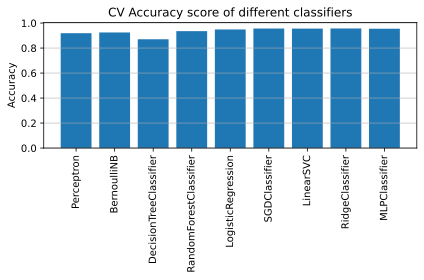

In [ ]:
import matplotlib.pyplot as plt

for model_type in models.keys():
    print(f'{model_type} cross-validation best score: {models[model_type].best_score_:.3f}')

linspace = [x for x in range(len(models.keys()))]
plt.bar(linspace, scores.values())
plt.xticks(linspace, [f'{m}' for m in models.keys()], rotation=90)
plt.grid(which='both', axis='y', alpha=0.7, zorder=1)
plt.ylabel('Accuracy')
plt.title('CV Accuracy score of different classifiers')
plt.tight_layout()
plt.savefig(os.path.join(data_dir, f'cv_accuracy.pdf'))
plt.show()

Perceptron ROC-AUC CV score: 0.976
BernoulliNB ROC-AUC CV score: 0.985
DecisionTreeClassifier ROC-AUC CV score: 0.862
RandomForestClassifier ROC-AUC CV score: 0.984
LogisticRegression ROC-AUC CV score: 0.988
SGDClassifier ROC-AUC CV score: 0.990
LinearSVC ROC-AUC CV score: 0.991
RidgeClassifier ROC-AUC CV score: 0.991
MLPClassifier ROC-AUC CV score: 0.991


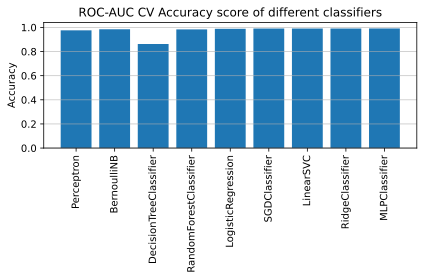

In [ ]:
def get_roc_auc(model_type):
    i = np.argmin(models[model_type].cv_results_['rank_test_roc_auc'])
    return models[model_type].cv_results_['mean_test_roc_auc'][i]

roc_auc_scores = {}
for model_type in models.keys():
    roc_auc_scores[model_type] = get_roc_auc(model_type)
    print(f'{model_type} ROC-AUC CV score: {get_roc_auc(model_type):.3f}')

linspace = [x for x in range(len(models.keys()))]
plt.bar(linspace, roc_auc_scores.values())
plt.xticks(linspace, [f'{m}' for m in models.keys()], rotation=90)
plt.grid(which='both', axis='y', alpha=0.7, zorder=1)
plt.ylabel('Accuracy')
plt.title('ROC-AUC CV Accuracy score of different classifiers')
plt.savefig(os.path.join(data_dir, f'cv_roc_auc.pdf'))
plt.tight_layout()
plt.show()

In [ ]:
table_data = []
for model_type in models.keys():
    vectorizer_params = models[model_type].best_estimator_.steps[0][1].get_params()
    table_data.append(
        (model_type,
         vectorizer_params['use_idf'],
         'Unigrams' if vectorizer_params['ngram_range'] == (1,1) else 'Bigrams',
         'All' if vectorizer_params['max_features'] == None else vectorizer_params['max_features'],
         scores[model_type]
        )
    )
pd.DataFrame(table_data, columns=['Classifier', 'Use idf', 'Uni/Bi-grams', 'Max Features', 'CV Accuracy'])

,Classifier,Use idf,Uni/Bi-grams,Max Features,CV Accuracy
0,Perceptron,False,Bigrams,5000,0.918756
1,BernoulliNB,True,Bigrams,5000,0.925097
2,DecisionTreeClassifier,True,Unigrams,1000,0.870584
3,RandomForestClassifier,False,Bigrams,All,0.935368
4,LogisticRegression,True,Unigrams,All,0.948958
5,SGDClassifier,True,Bigrams,All,0.956206
6,LinearSVC,True,Bigrams,All,0.955602
7,RidgeClassifier,True,Bigrams,All,0.957112
8,MLPClassifier,False,Bigrams,All,0.954696


Most of the best classifiers exploit a Vectorizer with all the available features. I suspect I might find a sweet spot if I increase the number of max features allowed.

## Evaluation



### Accuracy

Perceptron score: 0.906
BernoulliNB score: 0.924
DecisionTreeClassifier score: 0.848
RandomForestClassifier score: 0.934
LogisticRegression score: 0.951
SGDClassifier score: 0.949
LinearSVC score: 0.950
RidgeClassifier score: 0.949
MLPClassifier score: 0.953


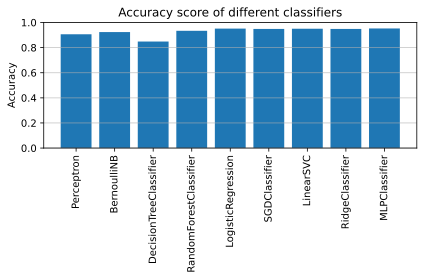

In [ ]:
eval_scores = {}
for model_type in models.keys():
    eval_scores[model_type] = models[model_type].score(Xtest, Ytest)
    print(f'{model_type} score: {eval_scores[model_type]:.3f}')

linspace = [x for x in range(len(models.keys()))]
plt.bar(linspace, eval_scores.values())
plt.xticks(linspace, [f'{m}' for m in models.keys()], rotation=90)
plt.grid(which='both', axis='y', alpha=0.7, zorder=1)
plt.ylabel('Accuracy')
plt.title('Accuracy score of different classifiers')
plt.tight_layout()
plt.savefig(os.path.join(data_dir, f'eval_accuracy.pdf'))
plt.show()

In [ ]:
table_data = []
for model_type in models.keys():
    vectorizer_params = models[model_type].best_estimator_.steps[0][1].get_params()
    table_data.append(
        (model_type,
         vectorizer_params['use_idf'],
         'Unigrams' if vectorizer_params['ngram_range'] == (1,1) else 'Bigrams',
         'All' if vectorizer_params['max_features'] == None else vectorizer_params['max_features'],
         eval_scores[model_type]
        )
    )
pd.DataFrame(table_data, columns=['Classifier', 'Use idf', 'Uni/Bi-grams', 'Max Features', 'Eval Accuracy'])

,Classifier,Use idf,Uni/Bi-grams,Max Features,Eval Accuracy
0,Perceptron,False,Bigrams,5000,0.906393
1,BernoulliNB,True,Bigrams,5000,0.923516
2,DecisionTreeClassifier,True,Unigrams,1000,0.848174
3,RandomForestClassifier,False,Bigrams,All,0.933790
4,LogisticRegression,True,Unigrams,All,0.951484
5,SGDClassifier,True,Bigrams,All,0.948630
6,LinearSVC,True,Bigrams,All,0.950342
7,RidgeClassifier,True,Bigrams,All,0.948630
8,MLPClassifier,False,Bigrams,All,0.952626


In [ ]:
models['MLPClassifier'].best_estimator_

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english',
                                 strip_accents='unicode', use_idf=False)),
                ('clf', MLPClassifier(hidden_layer_sizes=(256, 256, 256)))])

### Confusion Matrix

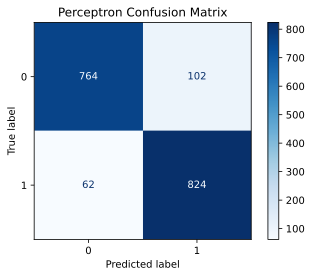

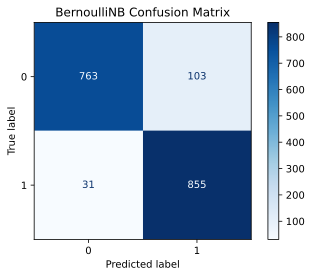

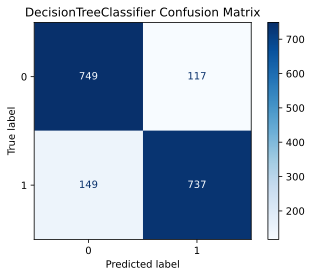

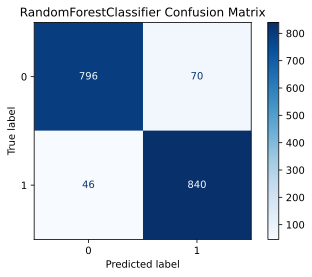

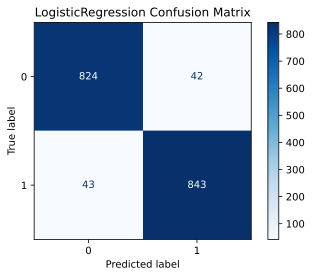

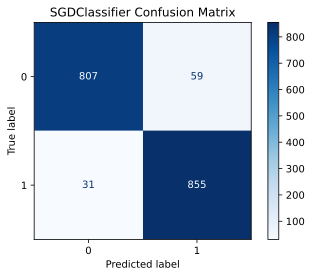

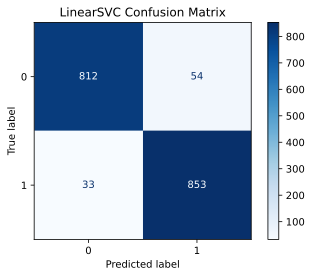

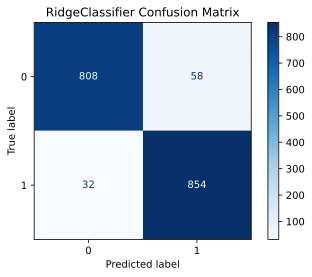

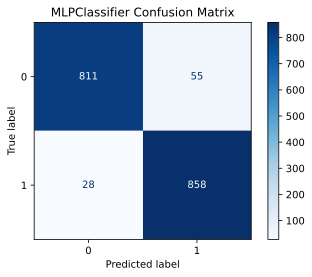

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for model_type in models.keys():
    disp = ConfusionMatrixDisplay.from_estimator(models[model_type],
                                                 Xtest, Ytest,
                                                 display_labels=models[model_type].classes_,
                                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(f'{model_type} Confusion Matrix')
    plt.savefig(os.path.join(data_dir, f'conf_mat_{model_type}.pdf'))
plt.show()

All models tend to have a very high precision and recall. For most of the classifiers, they seem to evaluate more often negative reviews as positive, rather than labelling negative reviews as positive.

This might point to those labels which are hard to precisely classify, such as the ones including both a "positive" and a "negative" adjective, for istance.

### Mislabeled Reviews

Let's look at some of the errors the baseline and other classifiers make.

NOTE: Confidence is only available for models that output a probability distribution such as the logistic regression, _e.g._ not the Perceptron model.

In [ ]:
predictions = models['Perceptron'].predict(Xtest)
display_cnt = 0
table_data = []
for i, (y, y_pred) in enumerate(zip(Ytest, predictions)):
    if y_pred != y and display_cnt < 10:
        # print(f'{i:3d}) pred/true/review: {y_pred}/{y} -- "{Xtest[i]}"')
        display_cnt += 1
        table_data.append((y, y_pred, Xtest[i], i))
pd.DataFrame(table_data, columns=['True Label', 'Predicted Label', 'Review', 'Review ID'])

,True Label,Predicted Label,Review,Review ID
0,0,1,"desert was great, starter and main (steak) wou...",11
1,0,1,ervice very slow and disjointed and not very f...,12
2,0,1,no real atmosphere and definitely not very fre...,42
3,0,1,no reasonably priced set lunch menu.,43
4,0,1,not recommended,44
5,0,1,ood was bland service not great,45
6,1,0,outstanding customer service and gorgeous food!,46
7,1,0,sticky fingers is the greatest!,64
8,0,1,the envrionment is not clean enough,69
9,0,1,the food is not fresh.,71


In [ ]:
predictions = models['DecisionTreeClassifier'].predict(Xtest)
probs = models['DecisionTreeClassifier'].predict_proba(Xtest)
display_cnt = 0
table_data = []
for i, (y, y_pred) in enumerate(zip(Ytest, predictions)):
    if y_pred != y and display_cnt < 10:
        # print(f'{i:3d}) pred/true/confidence/review: {y_pred}/{y}/{max(probs[i]):.2f} -- "{Xtest[i]}"')
        table_data.append((y, y_pred, max(probs[i]), Xtest[i], i))
        display_cnt += 1
pd.DataFrame(table_data, columns=['True Label', 'Predicted Label', 'Confidence', 'Review', 'Review ID'])

,True Label,Predicted Label,Confidence,Review,Review ID
0,1,0,1.000000,a wonderful experience!,1
1,0,1,0.992330,"desert was great, starter and main (steak) wou...",11
2,1,0,0.924347,food is better than our expectation. would lik...,19
3,1,0,1.000000,i felt like i was in good hands and was able t...,30
4,1,0,0.924347,i would definitely feel comfortable eating her...,32
5,1,0,0.924347,"incredible food, and visual presentation, the ...",34
6,0,1,0.992330,ood was bland service not great,45
7,1,0,0.924347,sticky fingers is the greatest!,64
8,1,0,0.500000,very good.,89
9,1,0,1.000000,"waiter was excellent. manager, chef, kitchen a...",91


The 11th review is mislabeled as a good comment despite being a negative one. I believe that the word "great" fools the model into believing it's a positive review, while instead referring to just one food, not to the overall restaurant experience.

In [ ]:
test_review = 44
table_data = []
for model_type in models.keys():
    y_pred = models[model_type].predict([Xtest[test_review]])[0]
    try:
        confidence = max(models[model_type].predict_proba([Xtest[test_review]])[0])
    except:
        confidence = 'N.A.'
    table_data.append((model_type, Ytest[test_review], y_pred, confidence, Xtest[test_review]))
pd.DataFrame(table_data, columns=['Classifier', 'True Label', 'Predicted Label', 'Confidence', 'Review'])

,Classifier,True Label,Predicted Label,Confidence,Review
0,Perceptron,0,1,N.A.,not recommended
1,BernoulliNB,0,1,0.992279,not recommended
2,DecisionTreeClassifier,0,0,0.924347,not recommended
3,RandomForestClassifier,0,0,0.532642,not recommended
4,LogisticRegression,0,1,0.710735,not recommended
5,SGDClassifier,0,1,N.A.,not recommended
6,LinearSVC,0,1,N.A.,not recommended
7,RidgeClassifier,0,1,N.A.,not recommended
8,MLPClassifier,0,0,0.965501,not recommended


### Feature Importance

Let's anylize the feature importance by analyzing the Random Forest classifier.

In [ ]:
vectorizer = models['RandomForestClassifier'].best_estimator_.steps[0][1]
randforest = models['RandomForestClassifier'].best_estimator_.steps[1][1]
# Get indeces of sorted importance values, then the sorted feature names
sorted_idx = (-randforest.feature_importances_).argsort()
features_names = vectorizer.get_feature_names_out()[sorted_idx]
features_vals = randforest.feature_importances_[sorted_idx]
# Logging
table_data = []
for elem in zip(features_names, features_vals):
    table_data.append(elem)
pd.DataFrame(table_data, columns=['Feature Name', 'Importance'])

,Feature Name,Importance
0,great,0.022768
1,delicious,0.014705
2,friendly,0.014235
3,amazing,0.011841
4,worst,0.010895
...,...,...
99577,house ny,0.000000
99578,house nice,0.000000
99579,house negroni,0.000000
99580,house place,0.000000


Not surprisingly, in the top 5 features we find 1-gram adjectives: "great", "delicious", "amazing", "excellent", "worst".

I expected negated verbs like "don", "wasn" and "didn" to be ranked higher, but they are still in the top-50 positions.

At the bottom there are very "strong" bigrams such as "disgusting behaviour", but apparently they are also very rare in the documents and so ranked low.

---

For the Decision Tree classifier, despite exploiting lesser number of features (1000 versus ~10000), the most important features remain the positive adjectives.

At the bottom are lesser important features like food names like "gyoza", which is a reasonable and intuitive assumption.

In [ ]:
vectorizer = models['DecisionTreeClassifier'].best_estimator_.steps[0][1]
randforest = models['DecisionTreeClassifier'].best_estimator_.steps[1][1]
# Get indeces of sorted importance values, then the sorted feature names
sorted_idx = (-randforest.feature_importances_).argsort()
features_names = vectorizer.get_feature_names_out()[sorted_idx]
features_vals = randforest.feature_importances_[sorted_idx]
# Logging
table_data = []
for elem in zip(features_names, features_vals):
    table_data.append(elem)
pd.DataFrame(table_data, columns=['Feature Name', 'Importance'])

,Feature Name,Importance
0,great,0.131911
1,delicious,0.089102
2,excellent,0.075286
3,amazing,0.072588
4,good,0.050104
...,...,...
995,guess,0.000000
996,guy,0.000000
997,gyoza,0.000000
998,gorgeous,0.000000


### ROC-AUC (TODO)

In [ ]:
from sklearn.metrics import roc_curve, auc

# # Calculate the FPR and TPR for all thresholds of the classification
# for model_type in models.keys():
#     probs = models[model_type].predict_proba(Xtest)
#     preds = probs[:,1]
#     fpr, tpr, threshold = roc_curve(Ytest, preds)
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, 'b', label=f'{model_type} AUC={roc_auc:0.2f}')

# plt.title('Receiver Operating Characteristic')
# plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'r--')
# plt.grid()
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

## Save and Load Models

In [ ]:
from joblib import dump, load

for model_type in models.keys():   
    dump(models[model_type], os.path.join(data_dir, f'{model_type}.joblib'))
print('All models saved to disk.')

In [ ]:
for model_type in models.keys():   
    models[model_type] = load(os.path.join(data_dir, f'{model_type}.joblib'))
print('All models loaded from disk.')

# Converting Notebook to PDF

The following two cells can be ignored for grading, as they just convert this notebook into a PDF file.

In [ ]:
%%capture
!apt-get update
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic
!apt-get install -y inkscape
!add-apt-repository -y universe
!add-apt-repository -y ppa:inkscape.dev/stable
!apt-get update -y
!apt install -y inkscape

In [ ]:
%%capture
import re

ASSIGNMENT_NAME = 'DAT340 - Assignment ' + ASSIGNMENT_ID.split('_')[1]
pdf_dir = os.path.join(os.path.abspath(''), 'drive', 'MyDrive')
pdf_dir = os.path.join(pdf_dir, 'Colab Notebooks', 'dat340', ASSIGNMENT_ID)
pdf_filename = re.escape(os.path.join(pdf_dir, ASSIGNMENT_NAME)) + '.ipynb'

!jupyter nbconvert --to pdf --TemplateExporter.exclude_input=False $pdf_filename